In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')

In [99]:
train_csv = pd.read_csv('train.csv')

In [151]:
final_csv = pd.read_csv('test.csv')

In [101]:
train_csv.columns

Index(['tripid', 'additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'pickup_time',
       'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare',
       'label'],
      dtype='object')

In [102]:
def show_null_count(csv):
    idx = csv.isnull().sum()
    idx = idx[idx>0]
    idx.sort_values(inplace=True)
    idx.plot.bar()

In [103]:
def get_corr(col, csv):
    corr = csv.corr()[col]
    idx_gt0 = corr[corr>0].sort_values(ascending=False).index.tolist()
    return corr[idx_gt0]


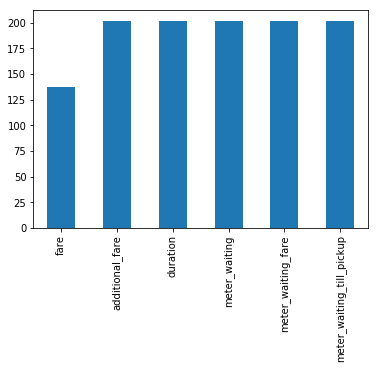

In [104]:
show_null_count(train_csv)

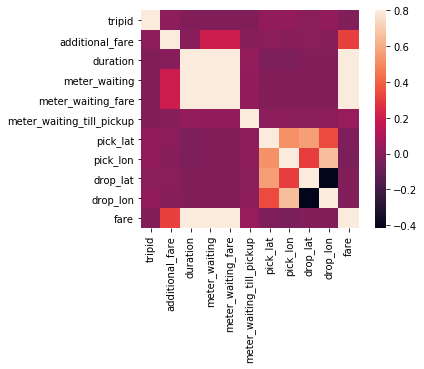

In [105]:
sns.heatmap(train_csv.corr(), vmax=.8, square=True)

In [106]:

# sns.pairplot(train_csv[['fare']].dropna())
# train_csv['fare'].value_counts()


In [107]:
train_csv.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,1.717600e+04,16974.000000,16974.000000,16974.000000,16974.000000,16974.000000,17176.000000,17176.000000,17176.000000,17176.000000,17039.000000
mean,2.014549e+08,13.719651,1702.858077,629.074231,32.057666,112.466832,6.965499,79.998389,6.968587,79.997534,312.655466
std,7.456830e+06,98.975052,8120.160818,8063.260669,465.483573,442.054812,0.210760,0.243384,0.378669,0.359648,605.300565
min,1.891236e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000
25%,1.947619e+08,10.500000,548.000000,33.000000,0.000000,26.000000,6.865077,79.870400,6.865625,79.870100,125.515000
50%,2.013582e+08,10.500000,1009.500000,123.000000,0.116600,73.000000,6.914105,79.898600,6.916160,79.899100,211.180000
75%,2.083081e+08,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043057,79.956600,7.047195,79.960225,366.465000
max,2.138173e+08,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000


In [108]:
print(get_corr('additional_fare', train_csv))


additional_fare              1.000000
fare                         0.315285
meter_waiting_fare           0.199604
meter_waiting                0.197605
tripid                       0.019145
pick_lat                     0.009124
drop_lat                     0.004644
meter_waiting_till_pickup    0.002355
drop_lon                     0.001539
pick_lon                     0.000621
Name: additional_fare, dtype: float64


In [109]:
from datetime import datetime
def find_time(csv):
    t2_data=csv['drop_time']
    t1_data=csv['pickup_time']
    data=[]
    for i in range(0,len(t2_data)):
        t2=t2_data[i].split(' ')[1]
        t1=t1_data[i].split(' ')[1]
        FMT='%H:%M'
        tdelta = (datetime.strptime(t2, FMT) - datetime.strptime(t1, FMT)).total_seconds()
        data.append(tdelta)
    csv['time']=data
find_time(train_csv)

In [110]:
train_csv['label']=train_csv['label'].replace('incorrect',int(0))

In [111]:
train_csv['label']=train_csv['label'].replace('correct',int(1))

In [112]:
print(train_csv.head(n=10))

      tripid  additional_fare  duration  meter_waiting  meter_waiting_fare  \
0  189123628             10.5     834.0           56.0              0.0000   
1  189125358             10.5     791.0           47.0              0.0000   
2  189125719             10.5    1087.0           80.0              0.0000   
3  189127273             10.5     598.0          271.0             15.6638   
4  189128020              NaN       NaN            NaN                 NaN   
5  189129552             10.5    3407.0          182.0              0.0000   
6  189132829             10.5    1246.0          487.0              0.0000   
7  189135103             10.5    1333.0          295.0             17.1985   
8  189139296             10.5     360.0           80.0              4.6640   
9  189138671             10.5    1539.0          588.0             33.9864   

   meter_waiting_till_pickup     pickup_time       drop_time  pick_lat  \
0                       64.0  11/1/2019 0:20  11/1/2019 0:34   6.86

In [113]:
train_csv.dropna(axis = 0, how ='any',inplace=True)
train_csv.reset_index(drop=True,inplace=True)
train_csv.isnull().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
time                         0
dtype: int64

In [114]:
print(train_csv.head(n=5))

      tripid  additional_fare  duration  meter_waiting  meter_waiting_fare  \
0  189123628             10.5     834.0           56.0              0.0000   
1  189125358             10.5     791.0           47.0              0.0000   
2  189125719             10.5    1087.0           80.0              0.0000   
3  189127273             10.5     598.0          271.0             15.6638   
4  189129552             10.5    3407.0          182.0              0.0000   

   meter_waiting_till_pickup     pickup_time       drop_time  pick_lat  \
0                       64.0  11/1/2019 0:20  11/1/2019 0:34   6.86252   
1                      134.0  11/1/2019 0:56  11/1/2019 1:09   6.88589   
2                       61.0  11/1/2019 1:08  11/1/2019 1:26   6.90839   
3                       68.0  11/1/2019 2:27  11/1/2019 2:37   6.92570   
4                      112.0  11/1/2019 5:38  11/1/2019 6:35   7.13402   

   pick_lon  drop_lat  drop_lon     fare  label    time  
0   79.8993   6.90330   79.8

In [115]:
train_csv['additional_fare'].unique()


array([1.050000e+01, 5.000000e+00, 6.050000e+01, 4.050000e+01,
       3.500000e+01, 0.000000e+00, 5.500000e+01, 1.105000e+02,
       1.110000e+02, 2.100000e+01, 2.050000e+01, 7.050000e+01,
       1.100000e+01, 8.050000e+01, 7.500000e+01, 1.050000e+02,
       2.210000e+02, 8.100000e+01, 4.508200e+02, 1.000000e+01,
       2.105000e+02, 3.050000e+01, 2.500000e+01, 1.279503e+04,
       9.150000e+01, 8.550000e+01, 8.000000e+01, 6.100000e+01])

In [116]:
train_csv.isnull().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
time                         0
dtype: int64

In [117]:
# train_csv['additional_fare_bin'] = pd.cut(train_csv['additional_fare'], bins=[0,6,11,31,61,int(max(train_csv['additional_fare'] ))+1], labels=['v_l','l','m','h','v_h'])

In [118]:
# train_csv['additional_fare_bin'].unique()

In [119]:
train_csv.dropna(axis = 0, how ='any',inplace=True)
train_csv.reset_index(drop=True,inplace=True)
train_csv.isnull().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
time                         0
dtype: int64

In [120]:
def find_duration(csv):
    time=csv['time']
    duration=csv['duration']
    data1=[]
    for i in range(0,len(time)):
        val1=int(time[i])/100
        val2=int(duration[i])/100
        if(int(val1)==int(val2)):
            data1.append(1)
        else:
            data1.append(0)

    csv['check_duration']=data1
find_duration(train_csv)

In [121]:
train_csv.isnull().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
time                         0
check_duration               0
dtype: int64

In [122]:
def find_distance(csv):
    lat1=csv['pick_lat']
    lat2=csv['drop_lat']
    lon1=csv['pick_lon']
    lon2=csv['drop_lon']
    distance=[]
    for i in range(0,len(lat1)):
        s=((lat1[i]-lat2[i])**2+(lon1[i]-lon2[i])**2)**0.5
        distance.append(int(s*1000))
    csv['distance']=distance

find_distance(train_csv)

In [123]:
train_csv.isnull().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
time                         0
check_duration               0
distance                     0
dtype: int64

In [124]:
train_csv.drop(['tripid','pickup_time','drop_time','pick_lat','pick_lon','drop_lat','drop_lon'],axis=1,inplace=True)


In [125]:
train_csv.isnull().sum()

additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
fare                         0
label                        0
time                         0
check_duration               0
distance                     0
dtype: int64

In [126]:
print(get_corr('meter_waiting', train_csv))

meter_waiting                1.000000
meter_waiting_fare           0.999474
duration                     0.969788
fare                         0.870126
additional_fare              0.197606
meter_waiting_till_pickup    0.030450
distance                     0.004051
Name: meter_waiting, dtype: float64


In [127]:
def waiting(csv):
    time=csv["meter_waiting"]
    fare=csv['meter_waiting_fare']
    waiting=[]
    for i in range(0,len(time)):
        if(int(time[i]/200)==int(fare[i]/15)):
           waiting.append(1)
        else:
           waiting.append(0)     
    csv['waiting']=waiting        
    
waiting(train_csv)

In [128]:
max(train_csv['distance'])

53857

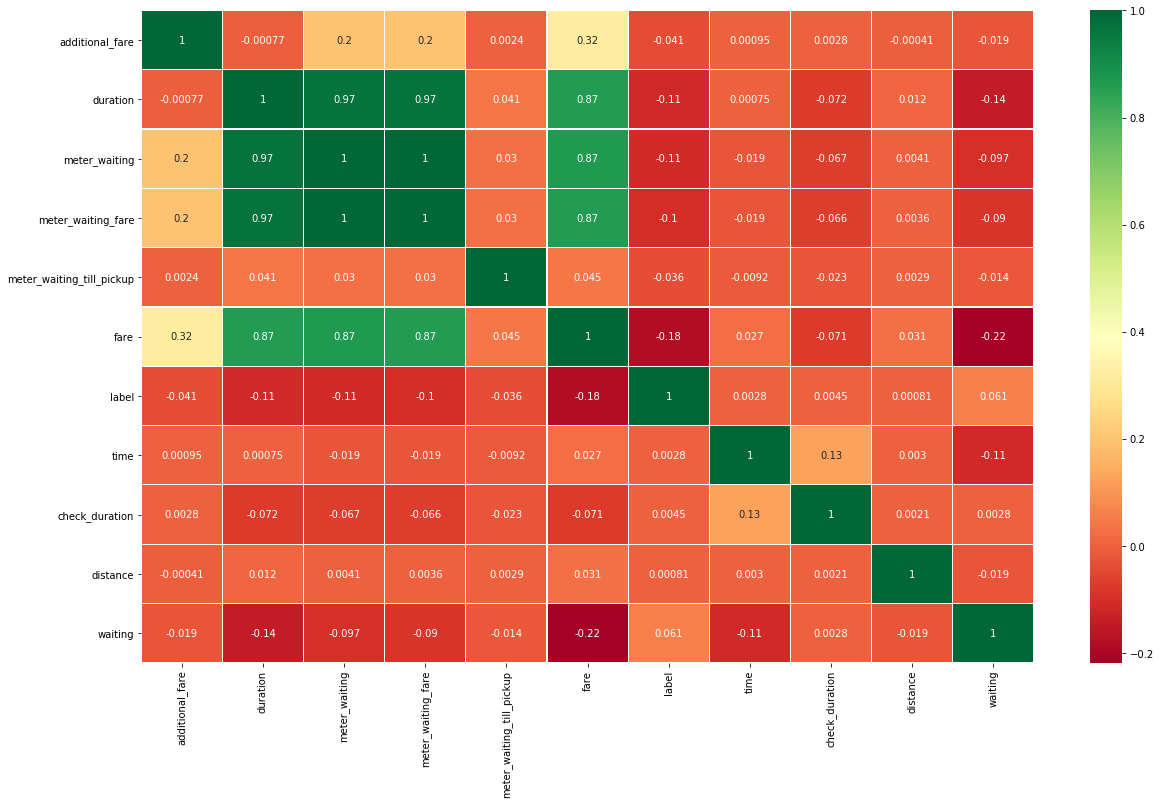

In [129]:
sns.heatmap(train_csv.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [130]:
def throttling(arr, thres):
    #res = arr.copy()
    res = np.zeros(len(arr))
    res[arr >= thres] = int(1)
    res[arr < thres] = int(0)
    return res

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
x_train,x_test,y_train,y_test = train_test_split(train_csv.drop('label', axis=1),
                                                 train_csv['label'],
                                                 test_size=0.33,
                                                 random_state=123)


In [133]:
from xgboost import XGBClassifier

In [134]:
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [135]:
# lr = LogisticRegression()
# lr.fit(x_train,y_train)
# y_pred_lr = lr.predict(x_test)

xgb = XGBClassifier(objective='binary:logistic', n_estimators=70, seed=101)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=70, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=101, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=101, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [136]:
y_pred_xgb = xgb.predict(x_test)

In [137]:
print('The accuracy of the XGB  is',round(accuracy_score(y_pred_xgb,y_test)*100,2))

The accuracy of the XGB  is 95.11


In [152]:
final_csv.columns

Index(['tripid', 'additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'pickup_time',
       'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare'],
      dtype='object')

In [153]:
find_time(final_csv)

In [154]:
final_csv.isnull().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
time                         0
dtype: int64

In [155]:
find_duration(final_csv)

In [156]:
find_distance(final_csv)

In [157]:
final_csv.drop(['pickup_time','drop_time','pick_lat','pick_lon','drop_lat','drop_lon'],axis=1,inplace=True)


In [158]:
waiting(final_csv)

In [159]:
orginal_csv=final_csv.copy()
final_csv.drop(['tripid'],axis=1,inplace=True)
final_csv.head(n=5)


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,time,check_duration,distance,waiting
0,10.5,924,42,2.4486,148,289.27,900.0,1,60,1
1,10.5,4249,20,0.0000,91,1912.70,4260.0,1,373,1
2,10.5,1552,255,2.6588,23,394.00,1560.0,1,53,0
3,10.5,462,16,0.0000,198,154.32,480.0,1,29,1
4,10.5,814,392,12.3692,69,147.47,840.0,1,23,0


In [160]:
y_final_prob = xgb.predict(final_csv)


In [161]:
print(y_final_prob)

[1 1 1 ... 1 1 1]


In [162]:
submission = pd.concat([orginal_csv['tripid'], pd.DataFrame(y_final_prob)], axis=1)
submission.columns = ['tripid', 'prediction']

In [163]:
submission.to_csv('submission.csv', encoding='utf-8', index = False)